# Problem Statement and Description

Using clustering techniques I'm trying to figure out patterns in this unsupervised data of student's feedback on courses and trying to predict natural propensity of students to repeat courses.

Gazi University.
in Ankara (Turkey).

Attribute Information : 

instr: Instructor's identifier; values taken from {1,2,3} 

class: Course code (descriptor); values taken from {1-13} 

repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...} 

attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}

difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5} 

Q1: The semester course content, teaching method and evaluation system were provided at the start. 

Q2: The course aims and objectives were clearly stated at the beginning of the period. 

Q3: The course was worth the amount of credit assigned to it. 

Q4: The course was taught according to the syllabus announced on the first day of class. 

Q5:	The class discussions, homework assignments, applications and studies were satisfactory. 

Q6: The textbook and other courses resources were sufficient and up to date.	

Q7: The course allowed field work, applications, laboratory, discussion and other studies. 

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.	

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures. 

Q10: My initial expectations about the course were met at the end of the period or year. 

Q11: The course was relevant and beneficial to my professional development. 

Q12: The course helped me look at life and the world with a new perspective. 

Q13: The Instructor's knowledge was relevant and up to date. 

Q14: The Instructor came prepared for classes. 

Q15: The Instructor taught in accordance with the announced lesson plan. 

Q16: The Instructor was committed to the course and was understandable. 

Q17: The Instructor arrived on time for classes. 

Q18: The Instructor has a smooth and easy to follow delivery/speech. 

Q19: The Instructor made effective use of class hours. 

Q20: The Instructor explained the course and was eager to be helpful to students. 

Q21: The Instructor demonstrated a positive approach to students. 

Q22: The Instructor was open and respectful of the views of students about the course. 

Q23: The Instructor encouraged participation in the course. 

Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students. 

Q25: The Instructor responded to questions about the course inside and outside of the course. 

Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives. 

Q27: The Instructor provided solutions to exams and discussed them with students. 

Q28: The Instructor treated all students in a right and objective manner. 

**Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}**



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving turkiye-student-evaluation_generic.csv to turkiye-student-evaluation_generic.csv
User uploaded file "turkiye-student-evaluation_generic.csv" with length 391968 bytes


In [0]:
import pandas as pd
pd.options.display.max_rows = 25000

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Data Import

In [0]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
col = df.columns.values

In [260]:
df.loc[:, 'nb.repeat':]

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,0,4,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# EDA based on student's response on LIKERT SCALE

In [16]:
df.columns.values

array(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1',
       'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype=object)

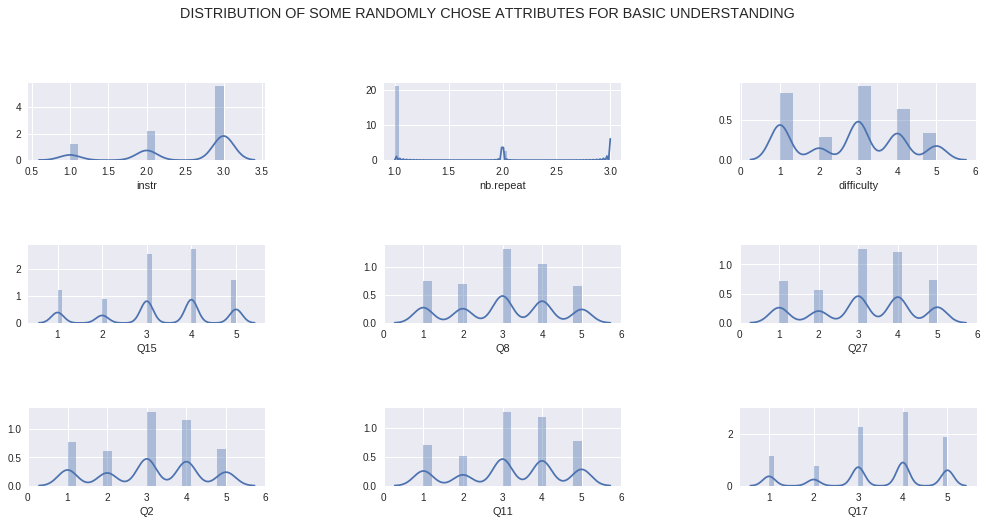

In [31]:
plt.tight_layout()
fig, axis = plt.subplots(3,3)

fig.set_size_inches(17,7)
ttl = fig.suptitle('DISTRIBUTION OF SOME RANDOMLY CHOSE ATTRIBUTES FOR BASIC UNDERSTANDING')
ttl.set_position([.5, 1.05])


left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace = 1.1 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

sns.distplot(df['instr'], ax = axis[0,0])
sns.distplot(df['nb.repeat'], ax = axis[0,1])
sns.distplot(df['difficulty'], ax = axis[0,2])
sns.distplot(df['Q15'], ax = axis[1,0])
sns.distplot(df['Q8'], ax = axis[1,1])
sns.distplot(df['Q27'], ax = axis[1,2])
sns.distplot(df['Q2'], ax = axis[2,0])
sns.distplot(df['Q11'], ax = axis[2,1])
sns.distplot(df['Q17'], ax = axis[2,2])

## Course which have highest & least amount of subject repeat with respect to their class strength

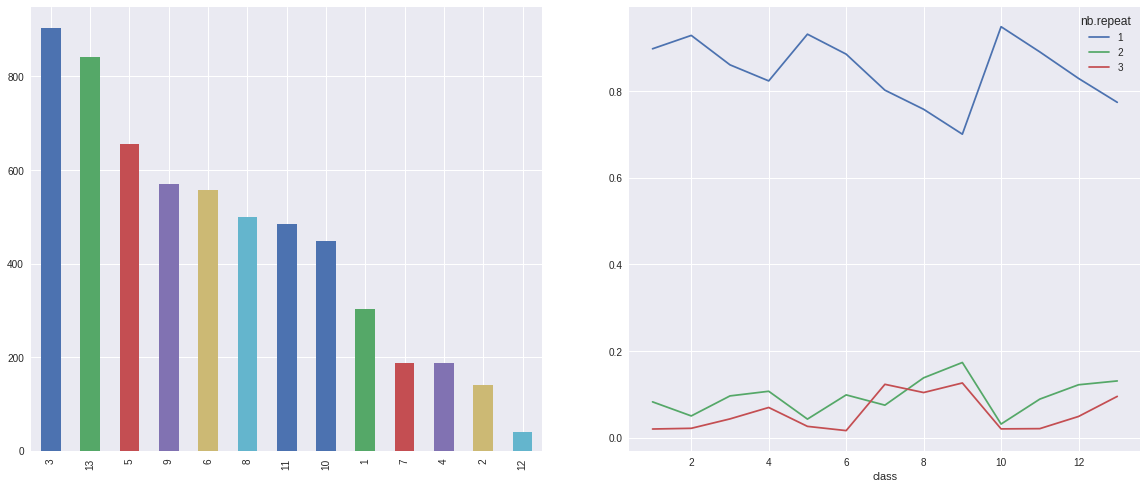

In [101]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df_class = df.groupby(['class', 'nb.repeat']).size().unstack()


df['class'].value_counts().plot(kind = 'bar', ax = axis[0])
df_class.apply(lambda x: x/df_class.sum(axis = 1)).plot(ax = axis[1])

**Inference**

-> Course '3', '13' and '5' has most of students

-> Course '12' has least number of students

-> Class '10' has least number of twice course repeat.

-> Class '9' has highest number of twice course repeat.

-> Class '9' also has the highest number of once repeat.


## Difficulty level of Courses and repeatation

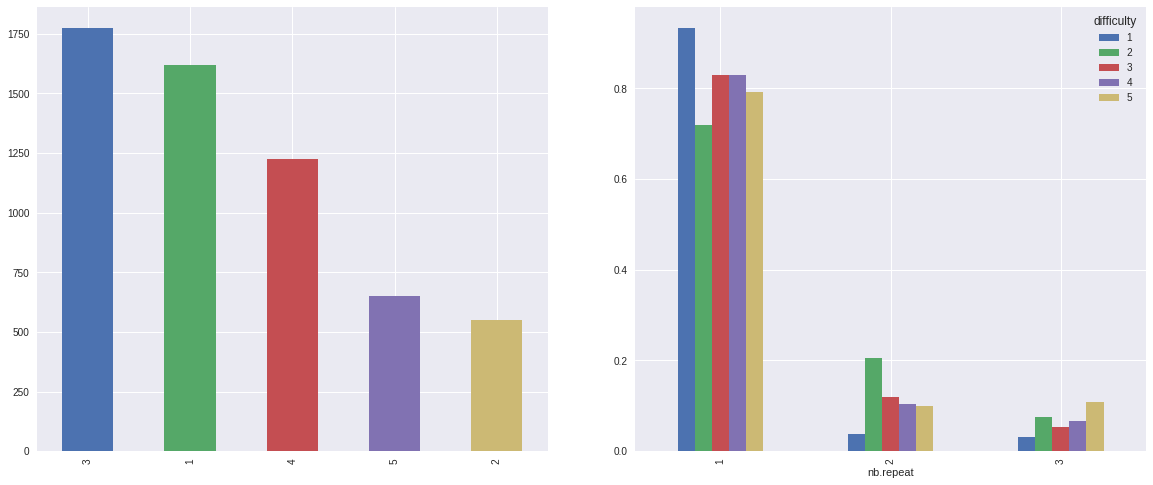

In [113]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['difficulty'].value_counts().plot(kind = 'bar', ax = axis[0])

df_difficulty = df.groupby(['nb.repeat', 'difficulty']).size().unstack()
df_difficulty = df_difficulty / df_difficulty.sum()
df_difficulty.plot(kind = 'bar', ax = axis[1])

**Inference**

-> 650+ students thought their individual course are most difficult

-> Despite of percieveing their course as most difficult, 79% of students did not have to repeat.

-> Only 10% of students repeated twice who thought their course is most difficult

-> Only 9% of student repeated once who thought their course is most difficult

## Attendence and course repeatation

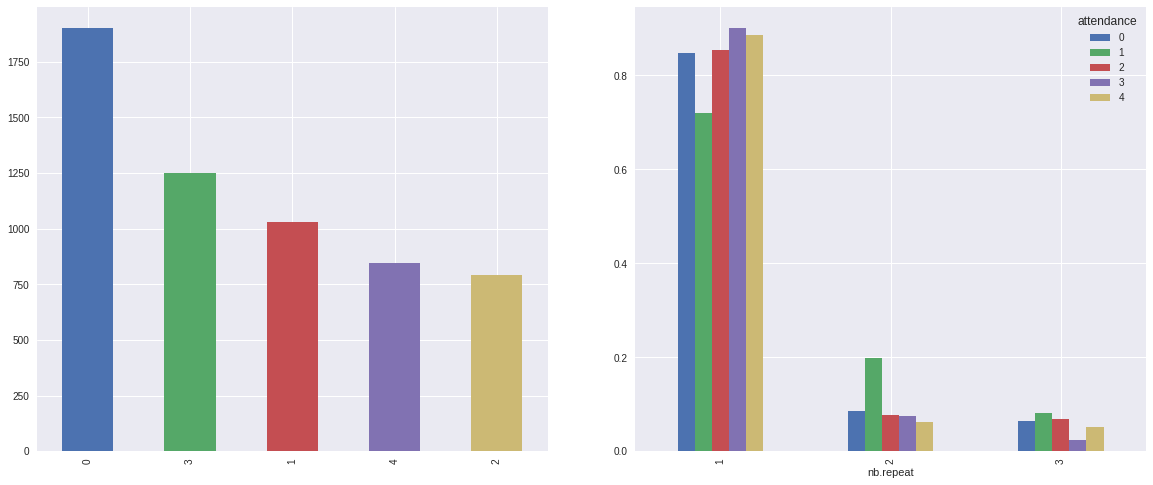

In [121]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['attendance'].value_counts().plot(kind = 'bar', ax = axis[0])

df_attendance = df.groupby(['nb.repeat', 'attendance']).size().unstack()
df_attendance = df_attendance / df_attendance.sum()
df_attendance.plot(kind = 'bar', ax = axis[1])

**Inference**

-> 6% of the students with highest attendance level repeated the course twice

-> 5% of the students with lowest attendance level repeated the course twice

-> 84% of the students with highest attendance level never repeated

-> 88% of the students with lowest attendance level never repeated

## Content of the courses and individual repeat

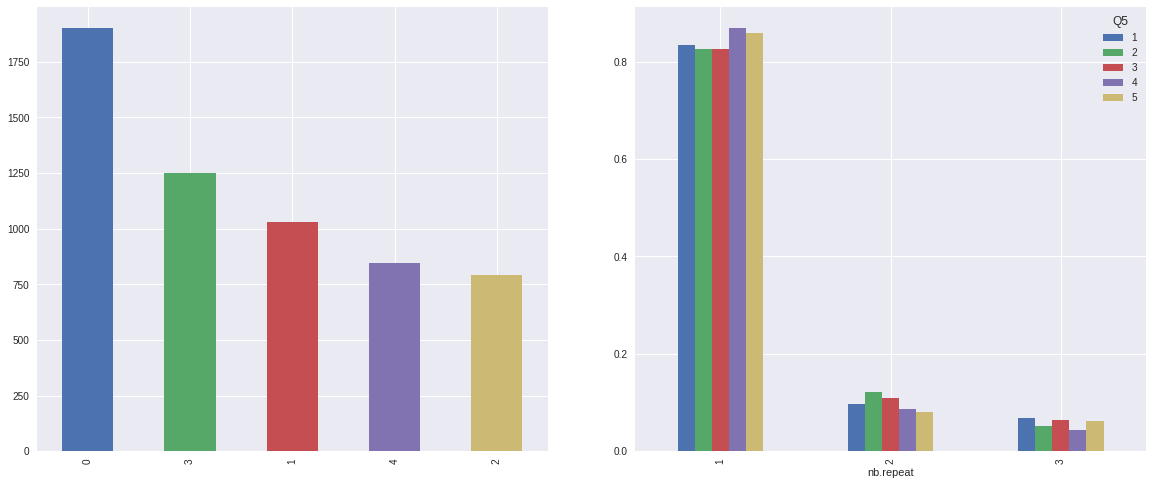

In [123]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['attendance'].value_counts().plot(kind = 'bar', ax = axis[0])

df_Q5 = df.groupby(['nb.repeat', 'Q5']).size().unstack()
df_Q5 = df_Q5 / df_Q5.sum()
df_Q5.plot(kind = 'bar', ax = axis[1])

**Inference**

-> 83% of the student who thought class discussions, homework assignments, applications and studies were satisfactory never had to repeat

->  6% of the students who thought class discussions, homework assignments, applications and studies were not satisfactory had to repeat twice

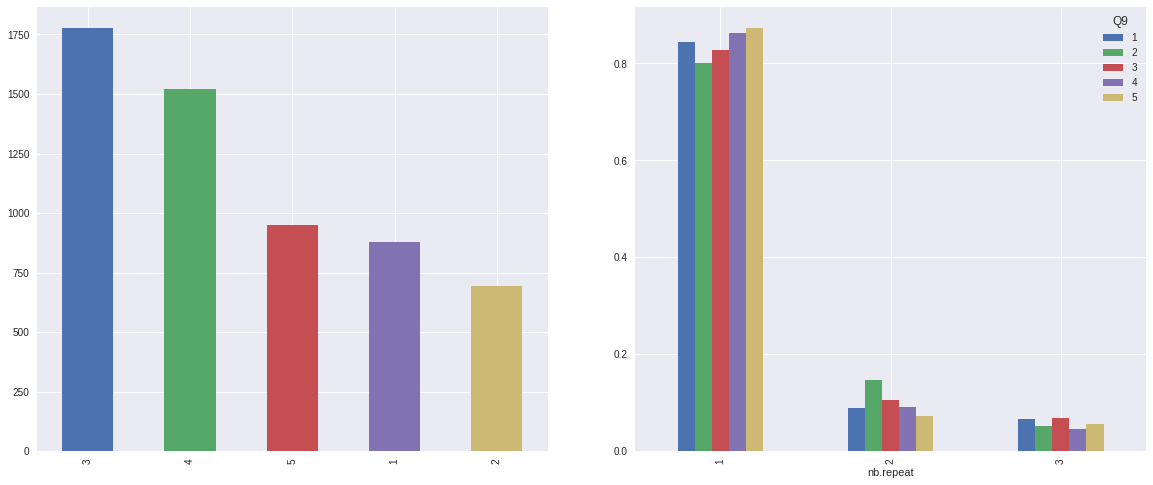

In [125]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['Q9'].value_counts().plot(kind = 'bar', ax = axis[0])

df_Q9 = df.groupby(['nb.repeat', 'Q9']).size().unstack()
df_Q9 = df_Q9 / df_Q9.sum()
df_Q9.plot(kind = 'bar', ax = axis[1])

**Inference**

->  85% of the students who thought they greatly enjoyed the class and was eager to actively participate during the lectures never had to repeat

->  5% of the student who did not had to repeat twice.

->  8% of the students who thought they greatly enjoyed the class and was eager to actively participate during the lectures had to repeat once

->  82% of neutral students never had to repeat

## Repeat and Instructor's approach to students

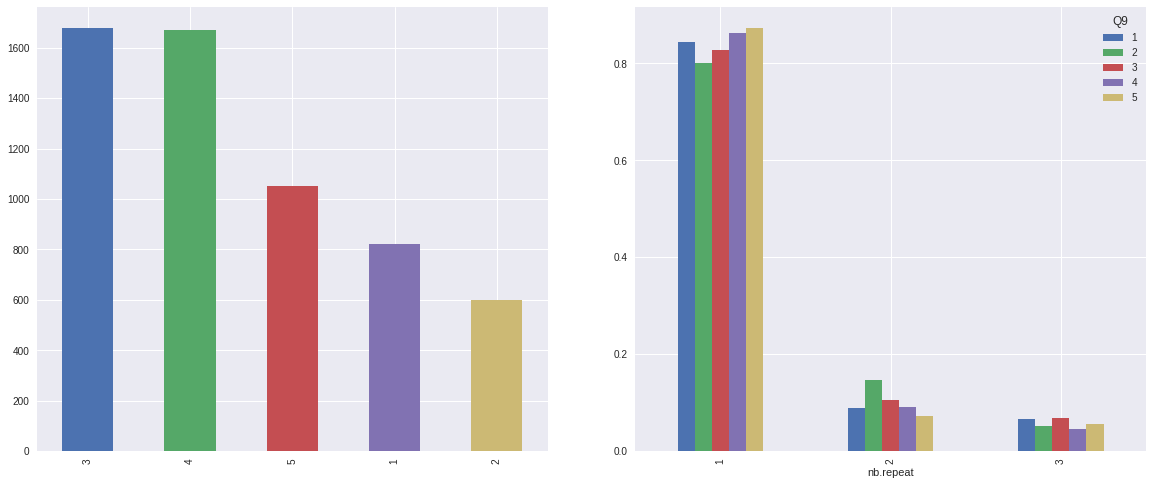

In [127]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['Q19'].value_counts().plot(kind = 'bar', ax = axis[0])

df_Q19 = df.groupby(['nb.repeat', 'Q9']).size().unstack()
df_Q19 = df_Q19 / df_Q19.sum()
df_Q19.plot(kind = 'bar', ax = axis[1])

**Inference**

->  87% of the students who thought Instructor's attitude towards them were not positive never had to repeat

->  6% of students had to repeat twice despite of instructor's positive attitude towards them

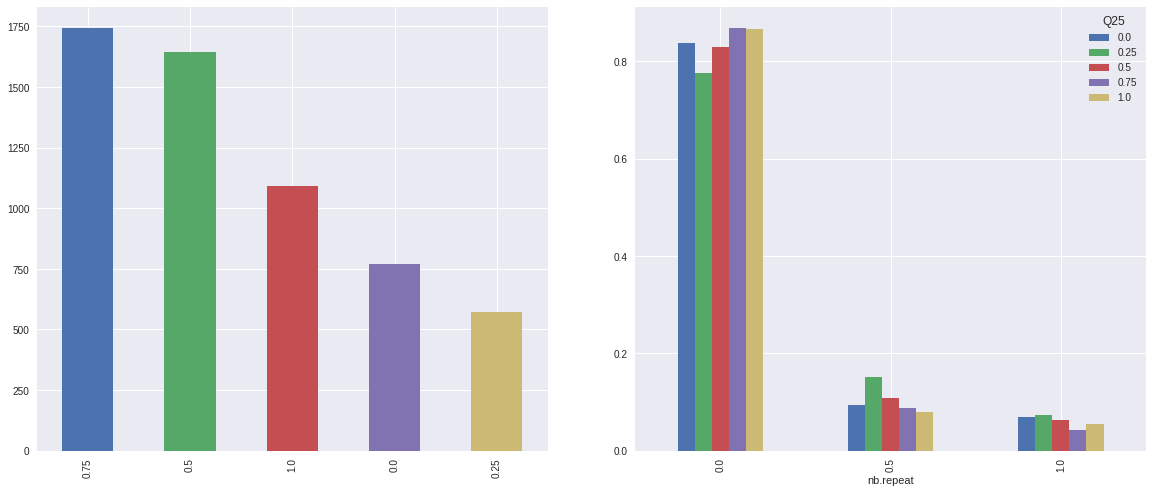

In [152]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['Q25'].value_counts().plot(kind = 'bar', ax = axis[0])

df_Q25 = df.groupby(['nb.repeat', 'Q25']).size().unstack()
df_Q25 = df_Q25 / df_Q25.sum()
df_Q25.plot(kind = 'bar', ax = axis[1])

**Inference**

->  

In [153]:
df_Q25

Q25,0.0,0.25,0.5,0.75,1.0
nb.repeat,,,,,
0.0,0.837662,0.775832,0.828258,0.868693,0.865508
0.5,0.093506,0.150613,0.109013,0.087729,0.078683
1.0,0.068831,0.073555,0.062728,0.043578,0.055810


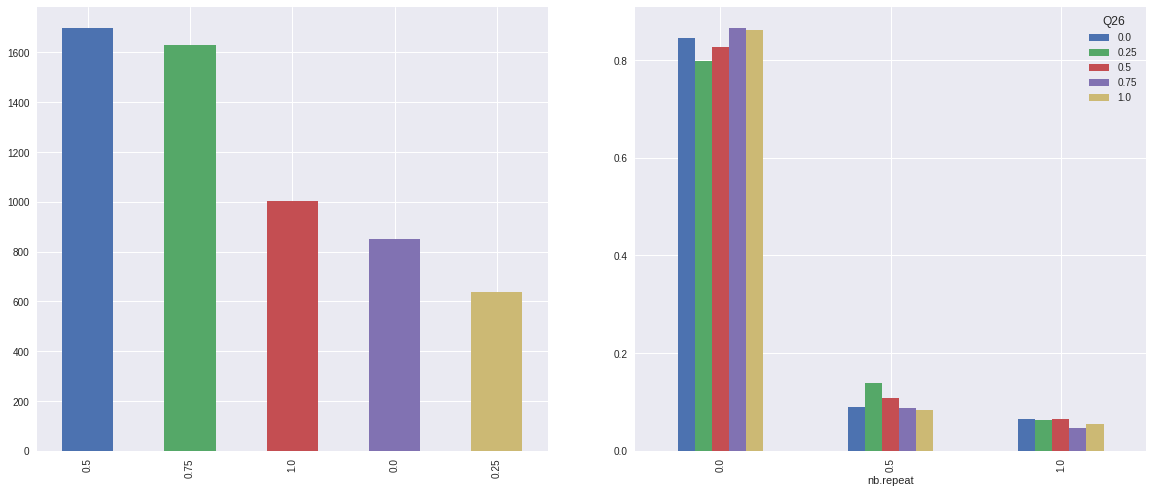

In [155]:
fig, axis = plt.subplots(1, 2)
plt.tight_layout()
fig.set_size_inches(17,7)

df['Q26'].value_counts().plot(kind = 'bar', ax = axis[0])

df_Q26 = df.groupby(['nb.repeat', 'Q26']).size().unstack()
df_Q26 = df_Q26 / df_Q26.sum()
df_Q26.plot(kind = 'bar', ax = axis[1])

In [169]:
df[2:].head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
2,-2.404987,0.082331,0.200915,0.070290,-0.221322,-0.028487,-0.012657,-0.023774,0.018994,0.002882,...,-0.000782,0.005260,0.008009,0.000780,-0.004222,-0.001596,-0.002812,-0.002373,0.001445,-0.000867
3,0.253322,-0.121363,0.099502,0.014371,-0.179165,-0.026430,-0.032684,-0.003845,0.023079,0.000717,...,-0.000509,0.002724,0.002471,0.001145,-0.000823,-0.000657,-0.000680,0.000856,0.000946,-0.000412
4,2.916429,-0.476960,-0.060568,-0.168477,-0.000536,0.008486,-0.052633,0.015363,0.023410,-0.002853,...,-0.000747,0.000448,-0.004253,0.001557,0.002396,-0.000290,0.000355,0.003972,0.000057,-0.000100
5,-1.091569,0.178606,0.191880,-0.190764,0.037450,0.025337,-0.056674,-0.009695,0.024963,-0.005221,...,-0.002280,0.006041,0.005045,0.000799,-0.000214,-0.002202,-0.003772,-0.001262,0.000865,-0.001666
6,-1.067388,-0.186825,0.097214,0.035410,-0.188494,-0.023151,-0.011284,-0.015662,0.017225,0.003203,...,-0.000442,0.003482,0.004515,0.001048,-0.003412,-0.001149,-0.001802,-0.000666,0.001045,-0.000392


# Data Standardization

In [0]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()

In [0]:
d = df.loc[:, 'nb.repeat':]
d = MM.fit_transform(d)
d = pd.DataFrame(d)
d.columns = col[2:]

In [263]:
d.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.0,0.00,0.75,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.0,0.25,0.50,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.0,0.50,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.25,0.50,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Decorrelating Attributes

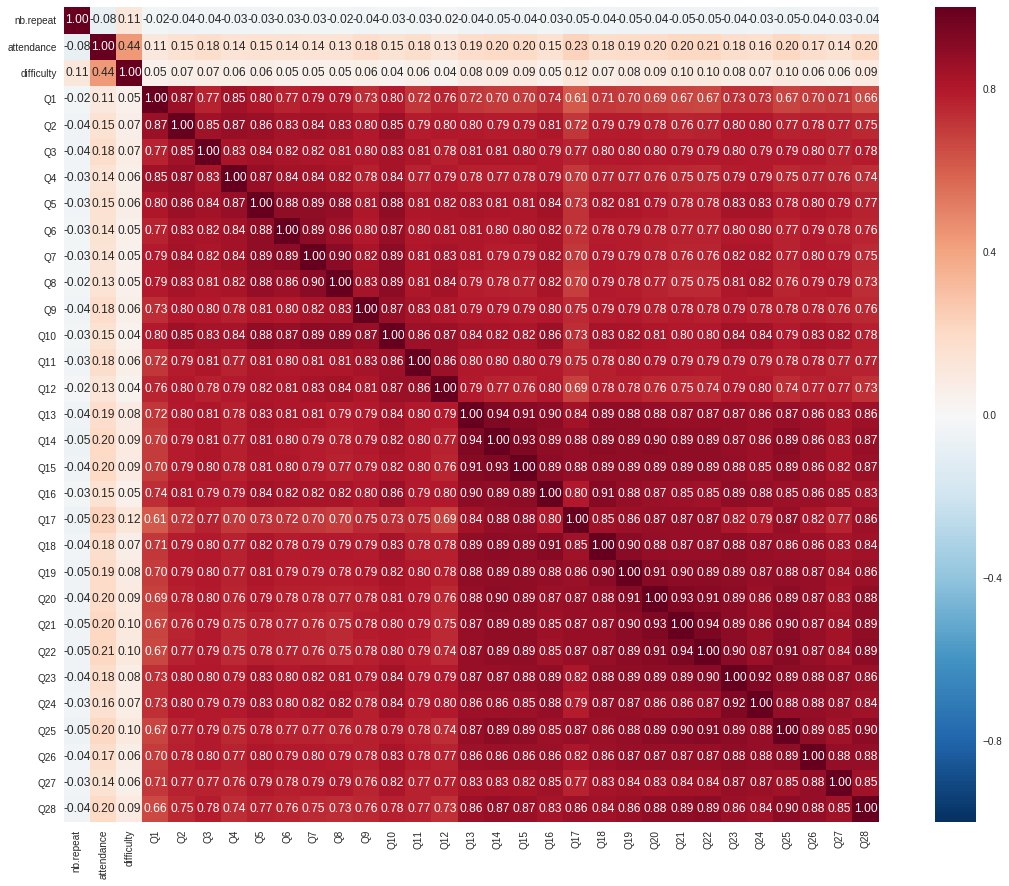

In [264]:
c = d.corr()

sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(20,15)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=d.columns.values, xticklabels=d.columns.values)

In [0]:
from sklearn.decomposition import PCA

p = PCA()

d = pd.DataFrame(p.fit_transform(d), columns = col[2:])

In [266]:
d.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.260614,-0.152176,0.110824,0.254387,-0.428608,-0.083533,-0.010067,-0.006108,0.022963,0.006334,...,0.000921,0.001186,0.003392,0.001222,-0.002242,0.000442,0.001401,0.001267,0.001426,0.000367
1,0.253322,-0.121363,0.099502,0.014371,-0.179165,-0.026430,-0.032684,-0.003845,0.023079,0.000717,...,-0.000509,0.002724,0.002471,0.001145,-0.000823,-0.000657,-0.000680,0.000856,0.000946,-0.000412
2,-2.404987,0.082331,0.200915,0.070290,-0.221322,-0.028487,-0.012657,-0.023774,0.018994,0.002882,...,-0.000782,0.005260,0.008009,0.000780,-0.004222,-0.001596,-0.002812,-0.002373,0.001445,-0.000867
3,0.253322,-0.121363,0.099502,0.014371,-0.179165,-0.026430,-0.032684,-0.003845,0.023079,0.000717,...,-0.000509,0.002724,0.002471,0.001145,-0.000823,-0.000657,-0.000680,0.000856,0.000946,-0.000412
4,2.916429,-0.476960,-0.060568,-0.168477,-0.000536,0.008486,-0.052633,0.015363,0.023410,-0.002853,...,-0.000747,0.000448,-0.004253,0.001557,0.002396,-0.000290,0.000355,0.003972,0.000057,-0.000100


# Outlier Analysis

In [0]:
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

In [432]:
EC = EmpiricalCovariance()
EC.fit(d)

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [0]:
sigma = inv(EC.covariance_)

In [0]:
cov_robust = MinCovDet()

cov_robust.fit(d)

sigma = inv(cov_robust.covariance_)

In [0]:
from scipy.spatial.distance import mahalanobis

d.reset_index(drop = True, inplace =True)

mean = d.mean()


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:750: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


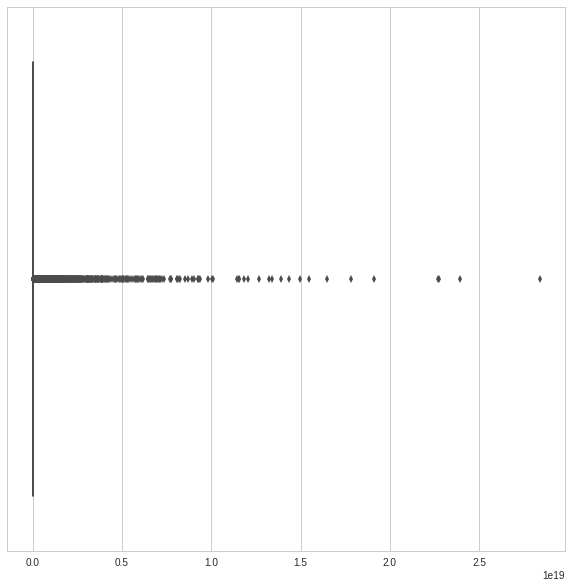

In [433]:
distances = []

for i in range(d.shape[0]):
    x= float(mahalanobis(d.loc[i,:], mean ,sigma) ** 2)
    distances.append(x)


plt.figure(figsize=(10, 10))

sns.boxplot(distances)


In [0]:
index_to_drop = []

for i in range(len(distances)):
    if distances[i] > np.percentile(distances, 99) or distances[i] < np.percentile(distances,0):
        index_to_drop.append(i)

In [0]:
d.drop(index = index_to_drop, inplace = True)

# Apply Clustering Technics to identify different segments of students

In [0]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from scipy.stats import kde
from sklearn.metrics import silhouette_score, pairwise_distances
import hdbscan

## KMeans Clustering

In [373]:
kmeans = KMeans(n_clusters=2, random_state= 666).fit(d)

kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns = col[2:])

kmeans_centroids

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,2.064733,-0.019436,0.02566,-0.011448,0.013498,0.004300,-0.001733,-0.005302,-0.004579,0.004614,...,-0.002945,-0.000047,-0.000556,0.002559,-0.001463,0.001044,-0.001081,0.000295,0.001323,-0.004630
1,-0.745130,0.003090,-0.00462,0.003333,-0.004277,-0.001353,-0.003061,0.002825,0.002288,-0.001331,...,0.001220,-0.000729,-0.000544,-0.000478,0.001124,-0.000221,0.000148,0.000561,-0.000157,0.000534


In [374]:
silhouette_score(d, kmeans.labels_)

0.43486286721500483

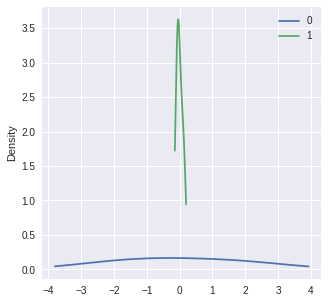

In [366]:
p = PCA(n_components = 2)
k = pd.DataFrame(p.fit_transform(kmeans_centroids))

k.plot(kind = 'kde', figsize = (5,5))

## Hierarchical Clustering

In [0]:
links =linkage(d, method = 'average')

In [369]:
dendrogram(links)
plt.figure(figsize=(300, 30))


In [371]:
c1 = cut_tree(links, height = 3)

silhouette_score(d, labels = c1.ravel())

0.44066691416125403

In [375]:
len(c1.ravel())

5761

## Density based Clustering

In [0]:
D = pairwise_distances(d, n_jobs = -1)

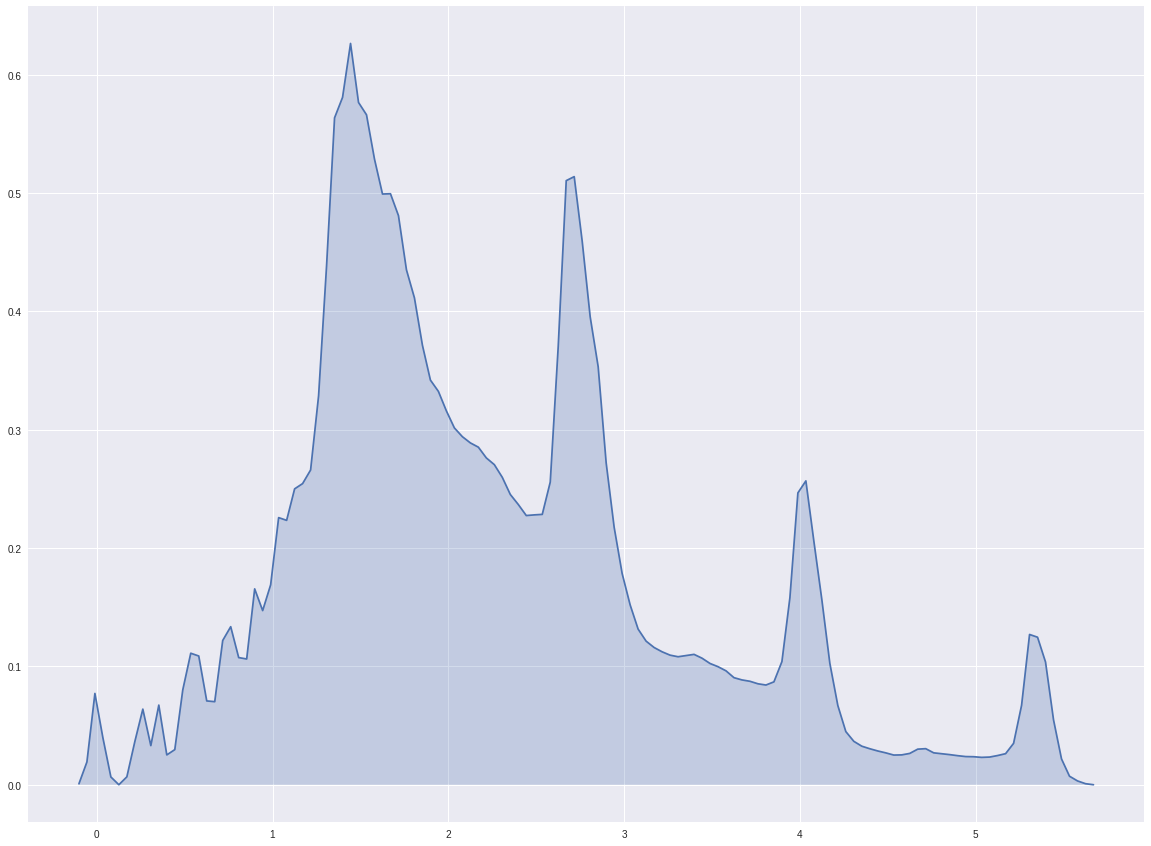

In [379]:
g = sns.kdeplot(D.flatten(), shade = True)

In [0]:
densities = kde.gaussian_kde(dataset = D.flatten())

In [0]:
clusterer = hdbscan.HDBSCAN

In [406]:
cluster_labels = clusterer.cluster_hierarchy_


AttributeError: ignored

In [398]:
silhouette_score(d, labels = cluster_labels)

0.261655409880931

In [407]:
d.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.260614,-0.152176,0.110824,0.254387,-0.428608,-0.083533,-0.010067,-0.006108,0.022963,0.006334,...,0.000921,0.001186,0.003392,0.001222,-0.002242,0.000442,0.001401,0.001267,0.001426,0.000367
1,0.253322,-0.121363,0.099502,0.014371,-0.179165,-0.026430,-0.032684,-0.003845,0.023079,0.000717,...,-0.000509,0.002724,0.002471,0.001145,-0.000823,-0.000657,-0.000680,0.000856,0.000946,-0.000412
2,-2.404987,0.082331,0.200915,0.070290,-0.221322,-0.028487,-0.012657,-0.023774,0.018994,0.002882,...,-0.000782,0.005260,0.008009,0.000780,-0.004222,-0.001596,-0.002812,-0.002373,0.001445,-0.000867
3,0.253322,-0.121363,0.099502,0.014371,-0.179165,-0.026430,-0.032684,-0.003845,0.023079,0.000717,...,-0.000509,0.002724,0.002471,0.001145,-0.000823,-0.000657,-0.000680,0.000856,0.000946,-0.000412
4,2.916429,-0.476960,-0.060568,-0.168477,-0.000536,0.008486,-0.052633,0.015363,0.023410,-0.002853,...,-0.000747,0.000448,-0.004253,0.001557,0.002396,-0.000290,0.000355,0.003972,0.000057,-0.000100


In [0]:
Y = df['nb.repeat']

X = d.drop('nb.repeat', )

In [408]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [0]:
X = df.drop(['instr', 'class', 'nb.repeat'], axis = 1)
Y = df['nb.repeat']

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators= 100)

In [414]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred = rf.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [417]:
accuracy_score(pred, y_test)

0.8642611683848798

AttributeError: ignored

In [420]:
df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64